In [1]:
%pip install pandas
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\patel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\patel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn import utils
import pickle
from sklearn import tree
import cv2


In [3]:
bread = np.load("relativearr/bread_relativearr.npy",allow_pickle=True)
night = np.load("relativearr/night_relativearr.npy",allow_pickle=True)
picnic = np.load("relativearr/picnic_relativearr.npy",allow_pickle=True)
cat = np.load("relativearr/cat_relativearr.npy",allow_pickle=True)
clock = np.load("relativearr/clock_relativearr.npy",allow_pickle=True)
house = np.load("relativearr/house_relativearr.npy",allow_pickle=True)
kites = np.load("relativearr/kites_relativearr.npy",allow_pickle=True)
monalisa = np.load("relativearr/monalisa_relativearr.npy",allow_pickle=True)
rocket = np.load("relativearr/rocket_relativearr.npy",allow_pickle=True)
rosie = np.load("relativearr/rosie_relativearr.npy",allow_pickle=True)
# square = np.load("relativearr/square_relativearr.npy",allow_pickle=True)
train = np.load("relativearr/train_relativearr.npy",allow_pickle=True)
garden = np.load("relativearr/garden_relativearr.npy",allow_pickle=True)
mountain = np.load("relativearr/mountain_relativearr.npy",allow_pickle=True)
italianvillage = np.load("relativearr/italianvillage_relativearr.npy",allow_pickle=True)
brokenegg = np.load("relativearr/brokenegg_relativearr.npy",allow_pickle=True)
dollar = np.load("relativearr/dollar_relativearr.npy",allow_pickle=True)
roses = np.load("relativearr/roses_relativearr.npy",allow_pickle=True)
manybugs = np.load("relativearr/many_bugs_relativearr.npy",allow_pickle=True)

In [7]:
print(len(bread))
print(len(night))
print(len(picnic))
print(len(cat))
print(len(clock))
print(len(house))
print(len(kites))
print(len(monalisa))
print(len(rocket))
print(len(rosie))
# print(len(square))
# print(len(train))
# print(len(garden))
# print(len(mountain))
# print(len(italianvillage))
# print(len(brokenegg))
# print(len(dollar))
# print(len(roses))
# print(len(manybugs))



96
84
72
48
40
40
24
48
40
36
0


In [8]:
combined = np.concatenate((bread, night, picnic, cat, clock, house, kites, monalisa, rocket, rosie, train, garden, mountain, italianvillage, brokenegg, dollar, roses, manybugs))
len(combined)

1016

In [9]:
max = 0
for i in combined:
    if(len(i[0])>max):
        max = len(i[0])

In [10]:
for i in combined:
    i[0] = np.array(i[0])
    i[0] = i[0].reshape((1,-1))
    i[0] = cv2.resize(i[0], (max,1), interpolation=cv2.INTER_NEAREST)
    # i[0] = np.pad(i[0], (0, max-len(i[0])), "constant", constant_values=0)

In [11]:
column = []
for i in range(max):
    column.append(str(i))

In [12]:
print(len(combined[1][0][0]))

1222


In [13]:
data = [c[0][0] for c in (combined[:,0:1])]

In [16]:

df = pd.DataFrame(data, columns=column)

In [17]:
print(df)

      0  1  2  3  4  5  6  7  8  9  ...  1212  1213  1214  1215  1216  1217  \
0     1  1  1  0  0  0  0  1  1  1  ...     0     0     0     0     0     0   
1     0  0  0  1  1  0  0  1  1  0  ...    -1    -1     0     0     0     0   
2     1  1  1  0  0  1  1  0  0  0  ...     0     0    -1    -1     0     0   
3     0  0  0  0  0  0  0  0  0  0  ...    -1    -1     0     0     0     0   
4     0  0  0  0  0  1  1  1  1  0  ...    -1    -1     0     0     0     0   
...  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
1011  0  0  0  0  0  0  0  0  0  0  ...    -1    -1     0     0     0     0   
1012  1  1  1  1  1  1  1  1  0  0  ...    -1    -1    -1     0     0     0   
1013  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
1014  1  1  1  1  1  1  1  1  1  1  ...    -1    -1    -1     0     0     0   
1015  1  1  1  1  1  1  1  1  1  1  ...     0     0     0     0     0     0   

      1218  1219  1220  1221  
0        0     0    

In [18]:
label = combined[:,1]

In [19]:
df_y = pd.DataFrame(label, columns=["y"])

In [20]:
print(df_y)

      y
0     1
1     1
2     2
3     1
4     0
...  ..
1011  0
1012  2
1013  2
1014  0
1015  0

[1016 rows x 1 columns]


In [29]:
print(df_y['y'].value_counts())

y
1    370
2    370
0    276
Name: count, dtype: int64


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [22]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# model = tree.DecisionTreeClassifier()
# model = MultinomialNB(force_alpha=True)
# model = BayesianGaussianMixture(n_components=1, random_state=42)
# model = KNeighborsClassifier(n_neighbors=3)
# model = SVC(gamma='auto')

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(df_y)

# model.fit(df, y_transformed)
# prediction = model.predict(df)

# print(sum(prediction-y_transformed))
# print(y_transformed)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, df, y_transformed, scoring='accuracy', cv=cv, n_jobs=-1)

C:\Users\patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.998 (0.004)


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [430]:
filename = 'relativearr/relativearr_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [431]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction = loaded_model.predict(df)

print(sum(prediction-y_transformed))

0


[[184   0   0]
 [  0 185   0]
 [  1   0 138]]


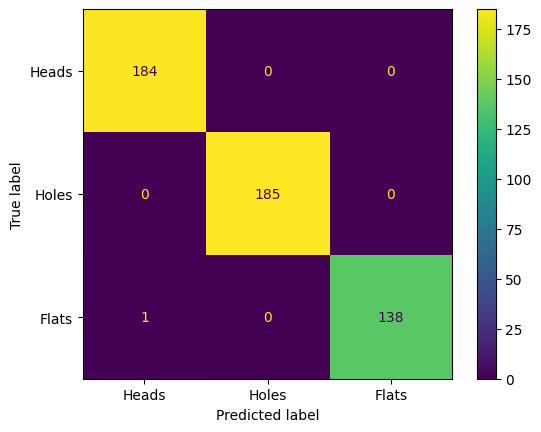

 Accuracy = 0.998


In [38]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = [[184, 0, 0],[0,185,0],[1,0,138]]
confusion_matrix = np.array(confusion_matrix)
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Heads', 'Holes', 'Flats'])

cm_display.plot()
plt.show()
print(" Accuracy = 0.998")